<a href="https://colab.research.google.com/github/Shasuf/Machine-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# import libraries
print("\n*** Import Libraries ***")
# hides all warnings
import warnings
warnings.filterwarnings('ignore')
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
# sns
import seaborn as sns
print("Done ...")



*** Import Libraries ***
Done ...


In [115]:
# import utils stored in g-drive / My Drive  / Collab Notebooks
print("\n*** Import Utils ***")
import sys
from google.colab import drive
drive.mount('/content/gdrive')
# To add a directory with your code into a list of directories 
# which will be searched for packages
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
import utils
print("Done ...")

##############################################


*** Import Utils ***
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Done ...


In [116]:

##############################################################
# Read Data 
##############################################################

# read dataset
print("\n*** Read Data ***")
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/sales_data-2.csv')
print("Done ...")


*** Read Data ***
Done ...


In [117]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/sales_data-2.csv',delimiter=',',usecols=['CustomerID','REVENUE','AVERAGE_ORDER_VALUE','CARRIAGE_REVENUE','AVERAGESHIPPING','AVGDAYSBETWEENORDERS','MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS','MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE','WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS','WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE','TIME_0000_0600_ORDERS','TIME_0601_1200_ORDERS','TIME_1200_1800_ORDERS','TIME_0000_0600_REVENUE','TIME_0601_1200_REVENUE','TIME_1200_1800_REVENUE','TIME_1801_2359_REVENUE'])

In [118]:
dft= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/sales_data-2.csv',delimiter=',',usecols=['TOTAL_ORDERS'])

In [119]:
##############################################################
# Exploratory Data Analysis
##############################################################

# rows & cols
print("\n*** Rows & Cols ***")
print("Rows",df.shape[0])
print("Cols",df.shape[1])



*** Rows & Cols ***
Rows 5000
Cols 35


In [120]:
# columns
print("\n*** Column Names ***")
print(df.columns)


*** Column Names ***
Index(['CustomerID', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE',
       'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'MONDAY_ORDERS',
       'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS',
       'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS', 'MONDAY_REVENUE',
       'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE',
       'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE',
       'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS',
       'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS',
       'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE',
       'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE',
       'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS',
       'TIME_1200_1800_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
      dtype='object')


In [121]:
# info
print("\n*** Structure ***")
print(df.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 5000 non-null   int64  
 1   REVENUE                    5000 non-null   float64
 2   AVERAGE_ORDER_VALUE        5000 non-null   float64
 3   CARRIAGE_REVENUE           5000 non-null   float64
 4   AVERAGESHIPPING            5000 non-null   float64
 5   AVGDAYSBETWEENORDERS       5000 non-null   float64
 6   MONDAY_ORDERS              5000 non-null   int64  
 7   TUESDAY_ORDERS             5000 non-null   int64  
 8   WEDNESDAY_ORDERS           5000 non-null   int64  
 9   THURSDAY_ORDERS            5000 non-null   int64  
 10  FRIDAY_ORDERS              5000 non-null   int64  
 11  SATURDAY_ORDERS            5000 non-null   int64  
 12  SUNDAY_ORDERS              5000 non-null   int64  
 13  MONDAY_REVENUE             50

In [122]:
# data types
print("\n*** Data Types ***")
print(df.dtypes)


*** Data Types ***
CustomerID                     int64
REVENUE                      float64
AVERAGE_ORDER_VALUE          float64
CARRIAGE_REVENUE             float64
AVERAGESHIPPING              float64
AVGDAYSBETWEENORDERS         float64
MONDAY_ORDERS                  int64
TUESDAY_ORDERS                 int64
WEDNESDAY_ORDERS               int64
THURSDAY_ORDERS                int64
FRIDAY_ORDERS                  int64
SATURDAY_ORDERS                int64
SUNDAY_ORDERS                  int64
MONDAY_REVENUE               float64
TUESDAY_REVENUE              float64
WEDNESDAY_REVENUE            float64
THURSDAY_REVENUE             float64
FRIDAY_REVENUE               float64
SATURDAY_REVENUE             float64
SUNDAY_REVENUE               float64
WEEK1_DAY01_DAY07_ORDERS       int64
WEEK2_DAY08_DAY15_ORDERS       int64
WEEK3_DAY16_DAY23_ORDERS       int64
WEEK4_DAY24_DAY31_ORDERS       int64
WEEK1_DAY01_DAY07_REVENUE    float64
WEEK2_DAY08_DAY15_REVENUE    float64
WEEK3_DAY16_DAY23_

In [123]:
# unique values
print("\n*** Unique Values ***")
print(df.apply(lambda x: x.nunique()))



*** Unique Values ***
CustomerID                   5000
REVENUE                      4635
AVERAGE_ORDER_VALUE          4113
CARRIAGE_REVENUE             1175
AVERAGESHIPPING               567
AVGDAYSBETWEENORDERS         3563
MONDAY_ORDERS                  19
TUESDAY_ORDERS                 22
WEDNESDAY_ORDERS               22
THURSDAY_ORDERS                23
FRIDAY_ORDERS                  24
SATURDAY_ORDERS                24
SUNDAY_ORDERS                  23
MONDAY_REVENUE               2151
TUESDAY_REVENUE              2201
WEDNESDAY_REVENUE            2262
THURSDAY_REVENUE             2582
FRIDAY_REVENUE               2378
SATURDAY_REVENUE             2149
SUNDAY_REVENUE               2573
WEEK1_DAY01_DAY07_ORDERS       27
WEEK2_DAY08_DAY15_ORDERS       34
WEEK3_DAY16_DAY23_ORDERS       33
WEEK4_DAY24_DAY31_ORDERS       32
WEEK1_DAY01_DAY07_REVENUE    3026
WEEK2_DAY08_DAY15_REVENUE    2900
WEEK3_DAY16_DAY23_REVENUE    2947
WEEK4_DAY24_DAY31_REVENUE    3386
TIME_0000_0600_ORDERS    

In [124]:
# head
print("\n*** Head ***")
print(df.head())


*** Head ***
   CustomerID   REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
0          22  11986.54                96.67            529.59   
1          29  11025.96               134.46             97.92   
2          83   7259.69               168.83            171.69   
3          95   6992.27               158.92             92.82   
4         124   6263.44               113.88            179.04   

   AVERAGESHIPPING  AVGDAYSBETWEENORDERS  MONDAY_ORDERS  TUESDAY_ORDERS  \
0             4.27                 14.19             13              13   
1             1.19                 15.89             11              13   
2             3.99                 33.12              5               4   
3             2.11                 21.11             10               8   
4             3.26                  6.65              2               3   

   WEDNESDAY_ORDERS  THURSDAY_ORDERS  ...  WEEK2_DAY08_DAY15_REVENUE  \
0                29               25  ...                    4299.

In [125]:
# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))



*** Outlier Count ***
CustomerID                     0
REVENUE                       40
AVERAGE_ORDER_VALUE          113
CARRIAGE_REVENUE              16
AVERAGESHIPPING               23
AVGDAYSBETWEENORDERS         351
MONDAY_ORDERS                 89
TUESDAY_ORDERS                29
WEDNESDAY_ORDERS              30
THURSDAY_ORDERS               34
FRIDAY_ORDERS                 36
SATURDAY_ORDERS               20
SUNDAY_ORDERS                 19
MONDAY_REVENUE               140
TUESDAY_REVENUE              139
WEDNESDAY_REVENUE            131
THURSDAY_REVENUE             101
FRIDAY_REVENUE               114
SATURDAY_REVENUE             137
SUNDAY_REVENUE                99
WEEK1_DAY01_DAY07_ORDERS      64
WEEK2_DAY08_DAY15_ORDERS      16
WEEK3_DAY16_DAY23_ORDERS      22
WEEK4_DAY24_DAY31_ORDERS      50
WEEK1_DAY01_DAY07_REVENUE    102
WEEK2_DAY08_DAY15_REVENUE    102
WEEK3_DAY16_DAY23_REVENUE     74
WEEK4_DAY24_DAY31_REVENUE     85
TIME_0000_0600_ORDERS        298
TIME_0601_1200_ORDER

In [126]:
# # handle outliers if required
print('\n*** Handle Outliers ***')
df = utils.HandleOutliers(df)
print("Done ...")



*** Handle Outliers ***
Done ...


In [127]:
# check outlier values
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))



*** Outlier Values ***
CustomerID                   []
REVENUE                      []
AVERAGE_ORDER_VALUE          []
CARRIAGE_REVENUE             []
AVERAGESHIPPING              []
AVGDAYSBETWEENORDERS         []
MONDAY_ORDERS                []
TUESDAY_ORDERS               []
WEDNESDAY_ORDERS             []
THURSDAY_ORDERS              []
FRIDAY_ORDERS                []
SATURDAY_ORDERS              []
SUNDAY_ORDERS                []
MONDAY_REVENUE               []
TUESDAY_REVENUE              []
WEDNESDAY_REVENUE            []
THURSDAY_REVENUE             []
FRIDAY_REVENUE               []
SATURDAY_REVENUE             []
SUNDAY_REVENUE               []
WEEK1_DAY01_DAY07_ORDERS     []
WEEK2_DAY08_DAY15_ORDERS     []
WEEK3_DAY16_DAY23_ORDERS     []
WEEK4_DAY24_DAY31_ORDERS     []
WEEK1_DAY01_DAY07_REVENUE    []
WEEK2_DAY08_DAY15_REVENUE    []
WEEK3_DAY16_DAY23_REVENUE    []
WEEK4_DAY24_DAY31_REVENUE    []
TIME_0000_0600_ORDERS        []
TIME_0601_1200_ORDERS        []
TIME_1200_1800_O

In [128]:
# check zeros
print('\n*** Columns With Zeros ***')
print((df==0).sum())



*** Columns With Zeros ***
CustomerID                      0
REVENUE                         0
AVERAGE_ORDER_VALUE             0
CARRIAGE_REVENUE              250
AVERAGESHIPPING               250
AVGDAYSBETWEENORDERS          506
MONDAY_ORDERS                2157
TUESDAY_ORDERS               2129
WEDNESDAY_ORDERS             2083
THURSDAY_ORDERS              1285
FRIDAY_ORDERS                2042
SATURDAY_ORDERS              2229
SUNDAY_ORDERS                1559
MONDAY_REVENUE               2161
TUESDAY_REVENUE              2129
WEDNESDAY_REVENUE            2089
THURSDAY_REVENUE             1287
FRIDAY_REVENUE               2047
SATURDAY_REVENUE             2231
SUNDAY_REVENUE               1564
WEEK1_DAY01_DAY07_ORDERS      941
WEEK2_DAY08_DAY15_ORDERS     1582
WEEK3_DAY16_DAY23_ORDERS     1520
WEEK4_DAY24_DAY31_ORDERS      928
WEEK1_DAY01_DAY07_REVENUE     945
WEEK2_DAY08_DAY15_REVENUE    1583
WEEK3_DAY16_DAY23_REVENUE    1524
WEEK4_DAY24_DAY31_REVENUE     932
TIME_0000_0600_ORDER

In [145]:
# drop col if all values are same
print("\n*** Same Value Cols Drop ***")
lDropCols = utils.SameValuesCols(df)
print(lDropCols)
if lDropCols != []:
    df = df.drop(lDropCols, axis=1)
print("Done ...")


*** Same Value Cols Drop ***
[]
Done ...


In [130]:
# drop col if contains 100% unique values
print("\n*** Uniq Value Cols Drop ***")
lDropCols = utils.UniqValuesCols(df)
print(lDropCols)
if lDropCols != []:
    df = df.drop(lDropCols, axis=1)
print("Done ...")



*** Uniq Value Cols Drop ***
['CustomerID']
Done ...


In [131]:
# drop col if more than 50% null values
print("\n*** Null Value Cols Drop ***")
lDropCols = utils.NullValuesCols(df)
print(lDropCols)
if lDropCols != []:
    df = df.drop(lDropCols, axis=1)
print("Done ...")



*** Null Value Cols Drop ***
[]
Done ...


In [132]:
# check nulls
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 



*** Columns With Nulls ***
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
AVGDAYSBETWEENORDERS         0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_0000_0600_ORDERS        0
TIME_0601_1200_ORDERS        0
TIME_1200_1800_ORDERS        0
TIME_0000_0600_REVENUE       0
TIME_0601_1

In [133]:
# check std dev 
print('\n*** StdDev In Columns ***') #diff between two sd shouldd be 999 for normalization
print(df.std())


*** StdDev In Columns ***
REVENUE                      1741.793224
AVERAGE_ORDER_VALUE            74.734388
CARRIAGE_REVENUE               46.445491
AVERAGESHIPPING                 1.677167
AVGDAYSBETWEENORDERS          182.932335
MONDAY_ORDERS                   2.019861
TUESDAY_ORDERS                  2.328746
WEDNESDAY_ORDERS                2.340149
THURSDAY_ORDERS                 2.320837
FRIDAY_ORDERS                   2.524130
SATURDAY_ORDERS                 2.310561
SUNDAY_ORDERS                   2.231787
MONDAY_REVENUE                287.304949
TUESDAY_REVENUE               312.040088
WEDNESDAY_REVENUE             314.756249
THURSDAY_REVENUE              317.816146
FRIDAY_REVENUE                337.533257
SATURDAY_REVENUE              301.662050
SUNDAY_REVENUE                316.362814
WEEK1_DAY01_DAY07_ORDERS        3.016181
WEEK2_DAY08_DAY15_ORDERS        3.613923
WEEK3_DAY16_DAY23_ORDERS        3.747379
WEEK4_DAY24_DAY31_ORDERS        3.678600
WEEK1_DAY01_DAY07_REVENUE     

In [134]:
# # handle normalization if required
print('\n*** Normalize Data ***')
df = utils.NormalizeData(df)
print('Done ...')


*** Normalize Data ***
Done ...



*** Boxplot ***


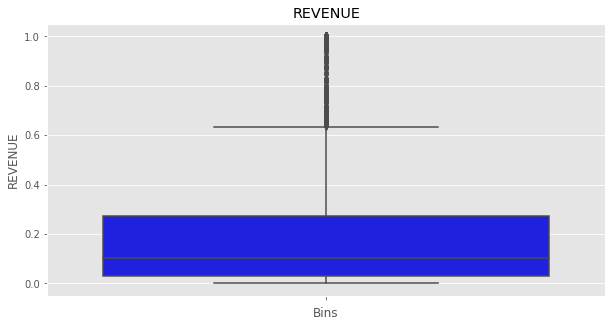

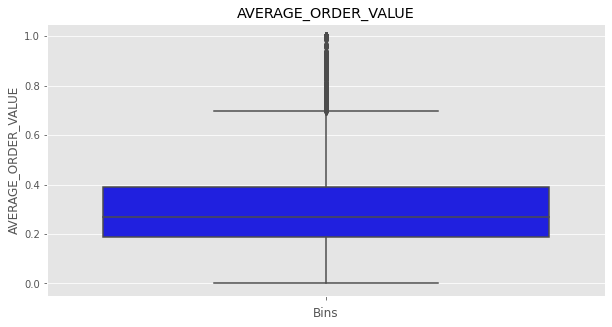

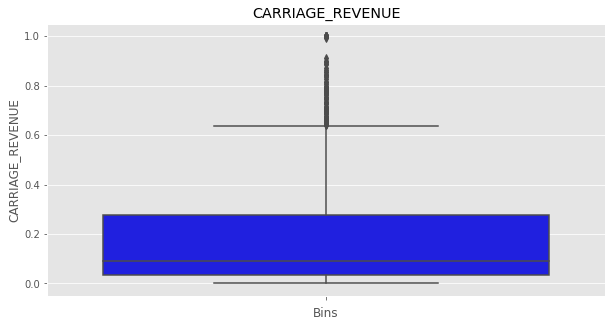

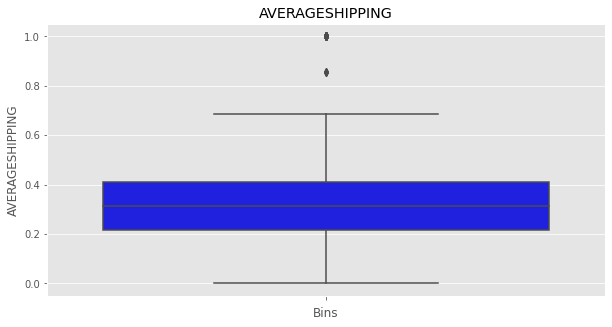

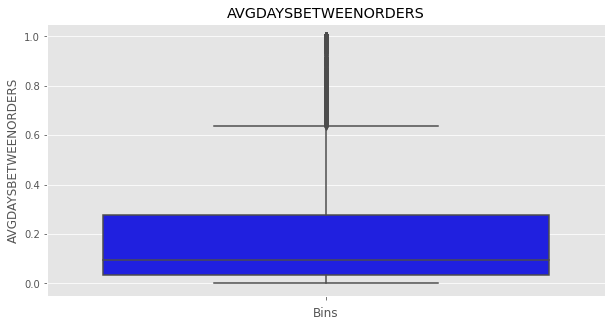

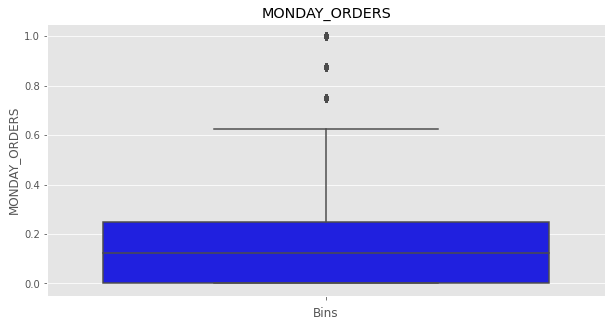

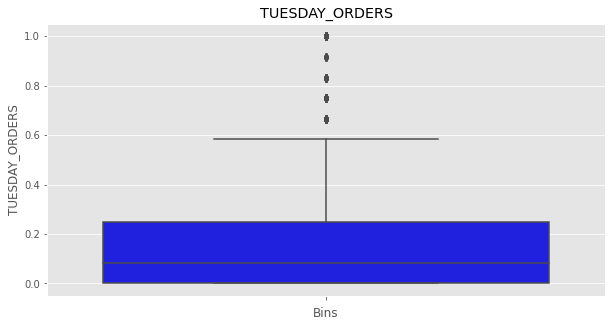

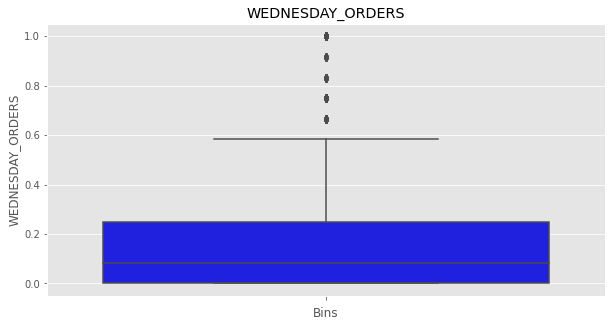

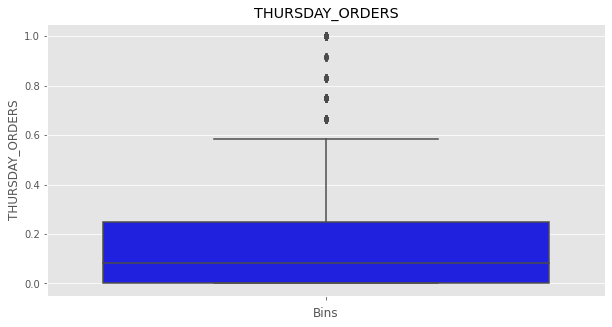

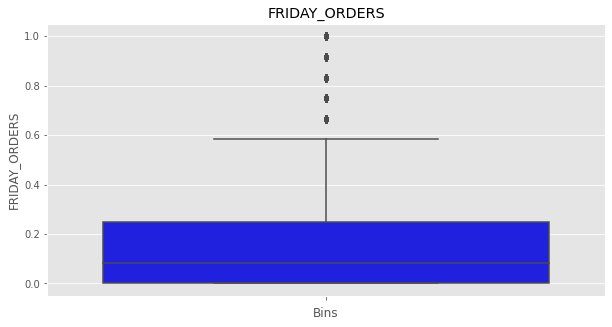

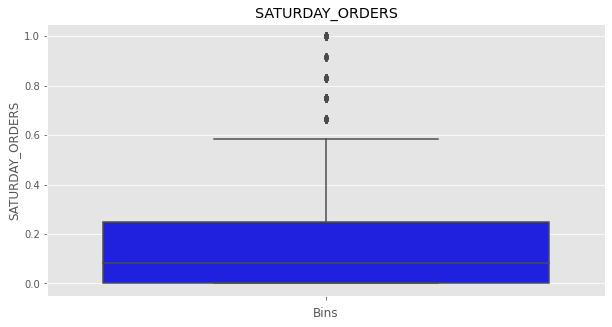

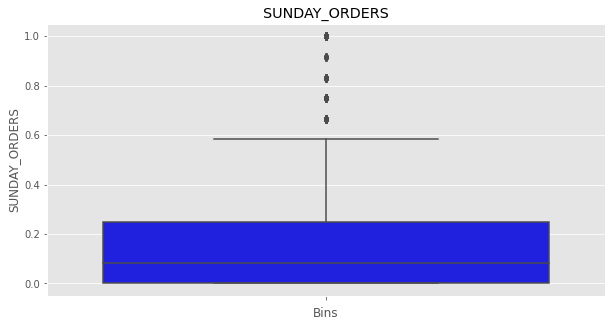

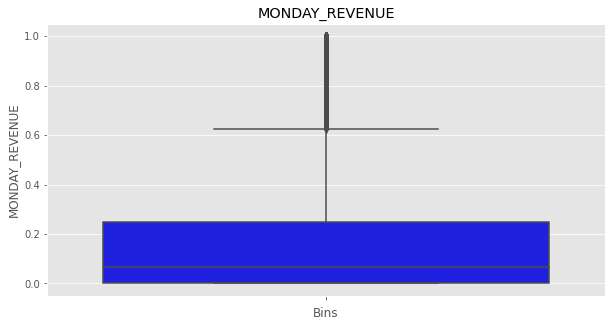

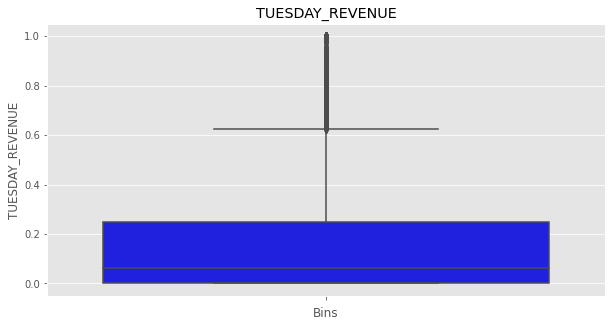

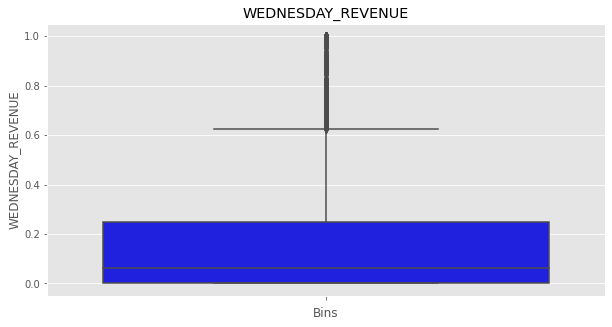

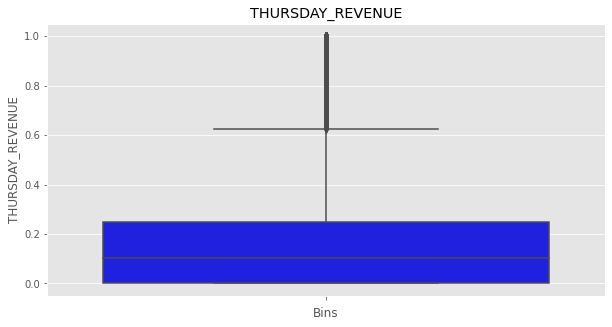

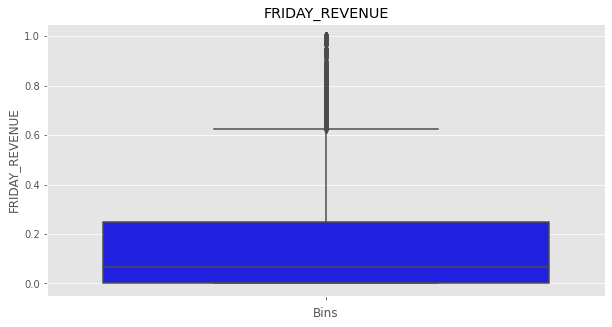

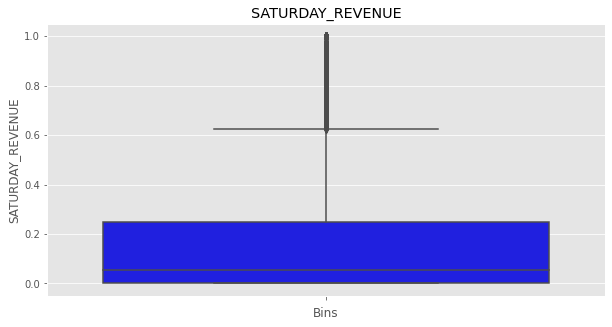

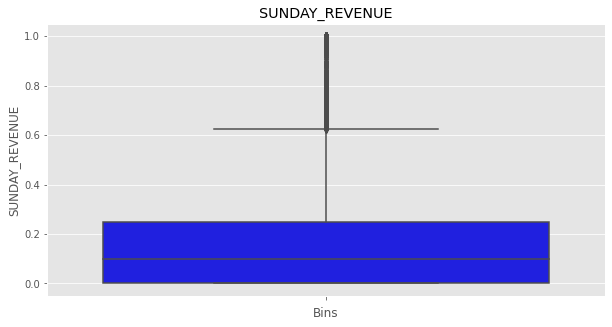

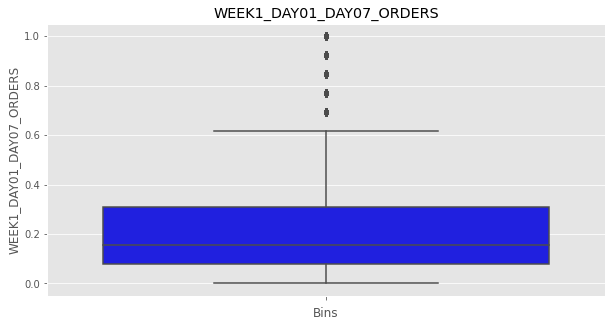

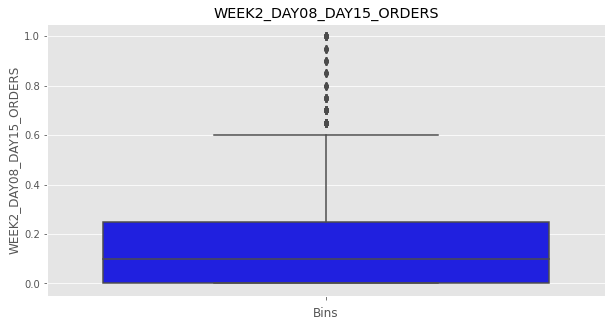

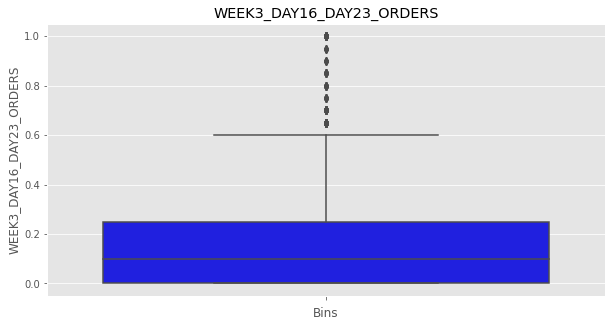

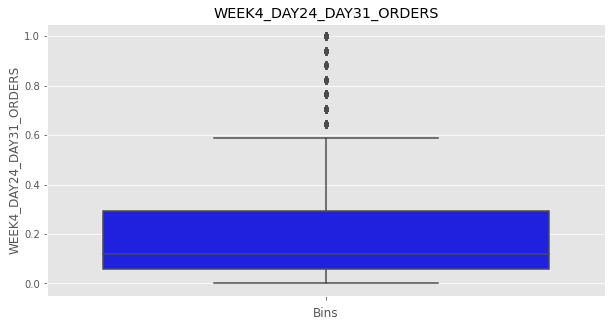

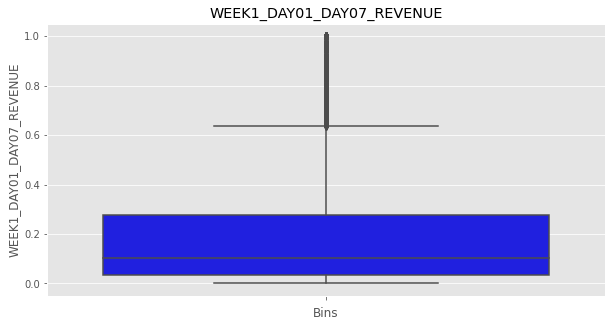

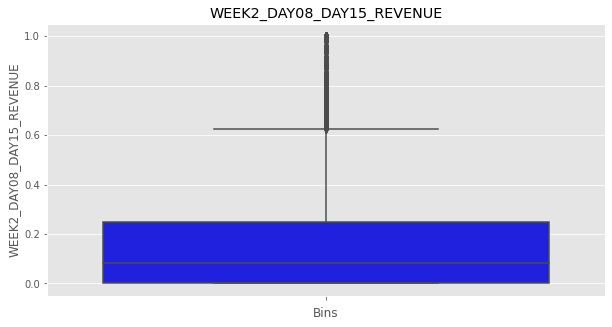

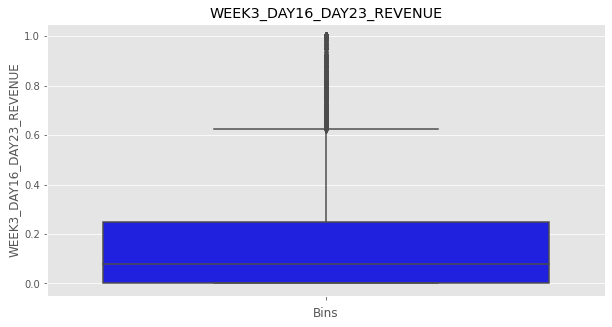

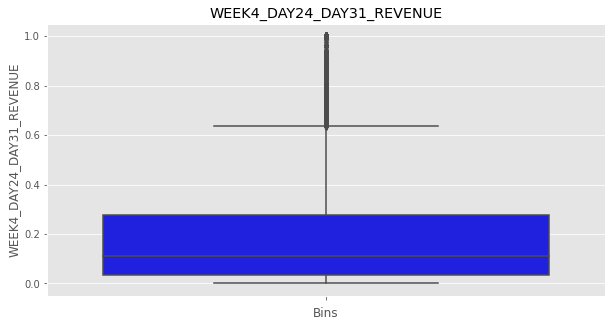

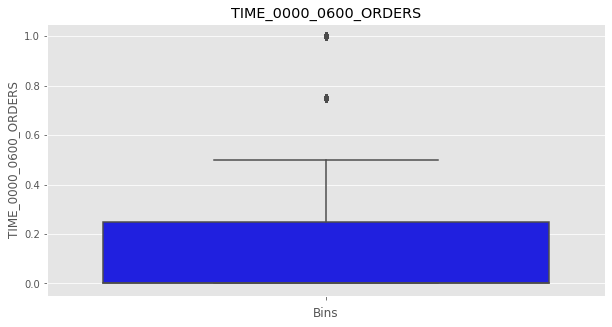

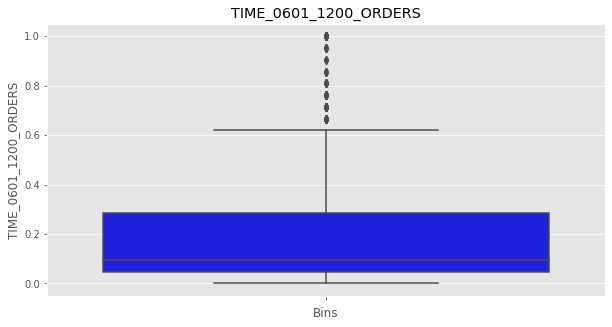

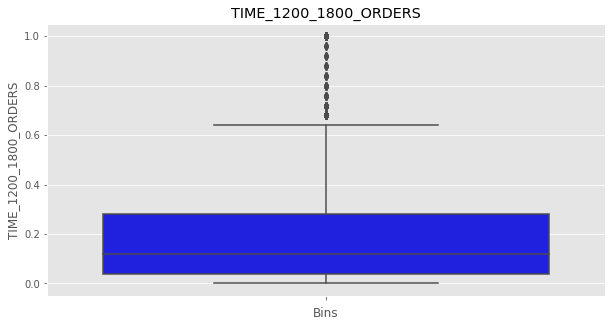

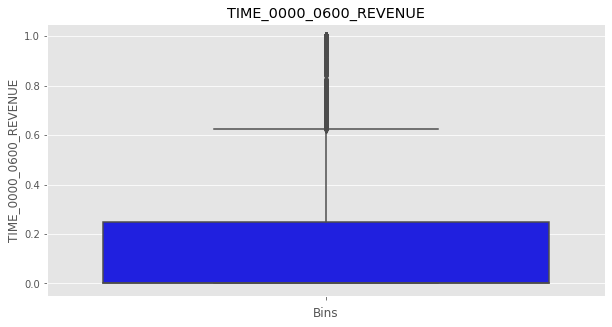

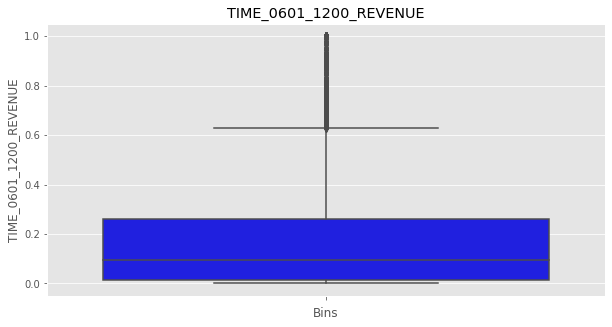

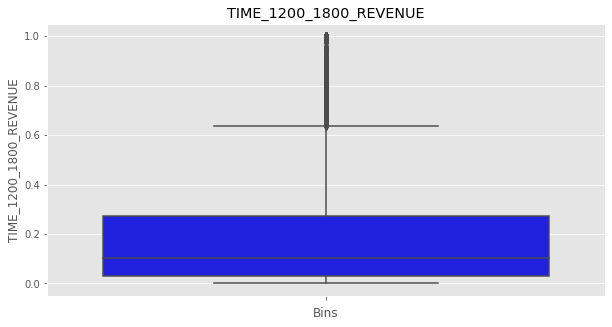

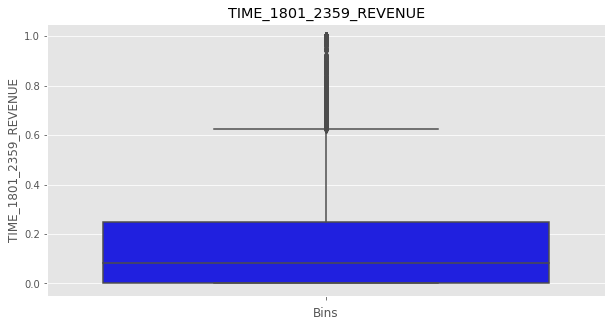

In [135]:
##############################################################
# Visual Data Analysis
##############################################################

# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()



*** Histogram Plot ***
Histograms


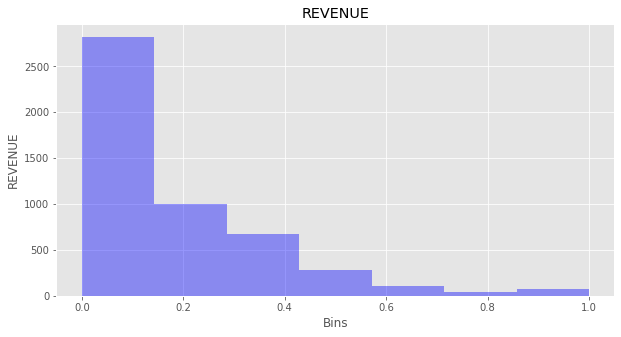

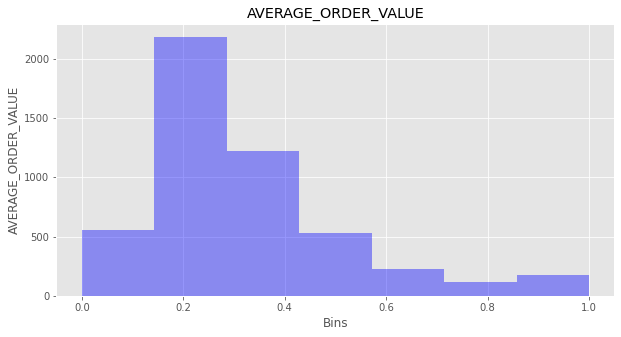

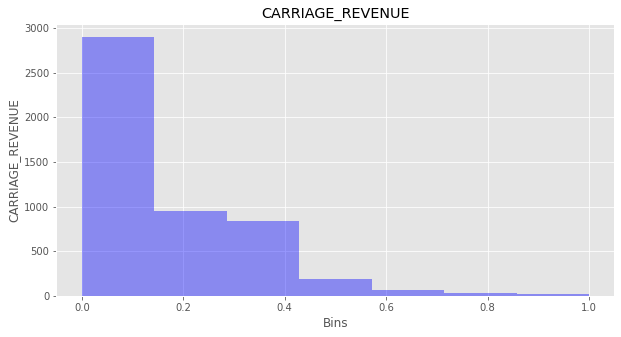

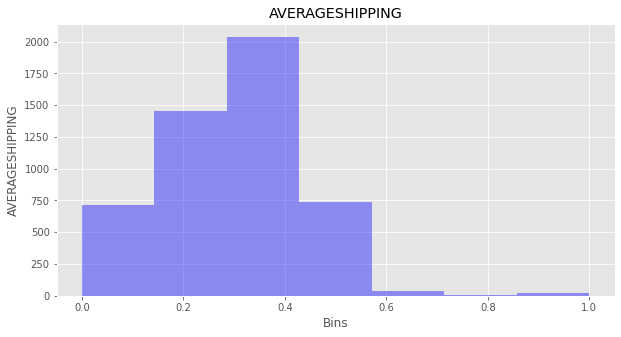

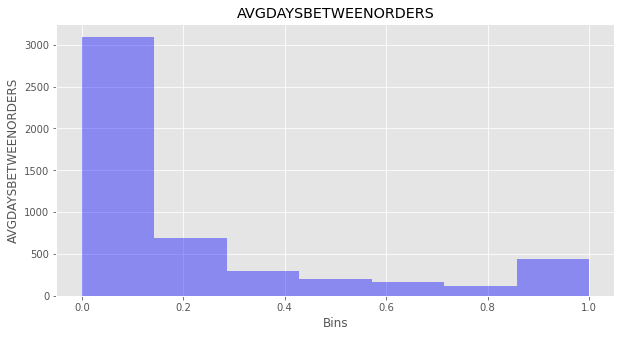

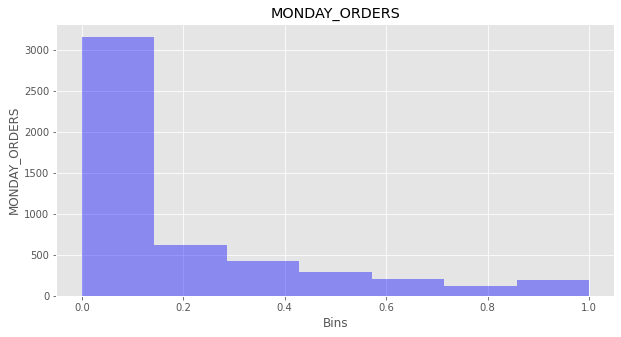

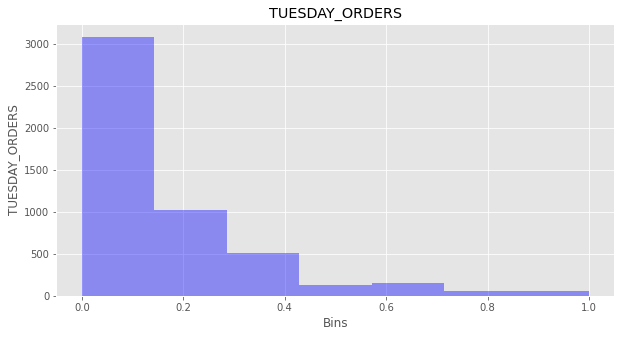

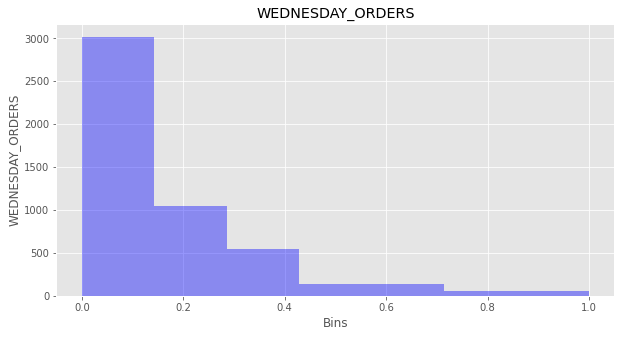

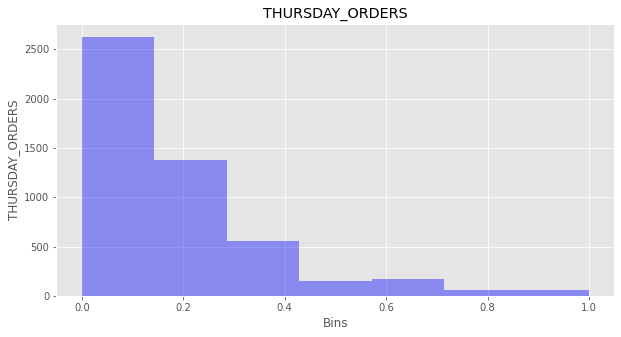

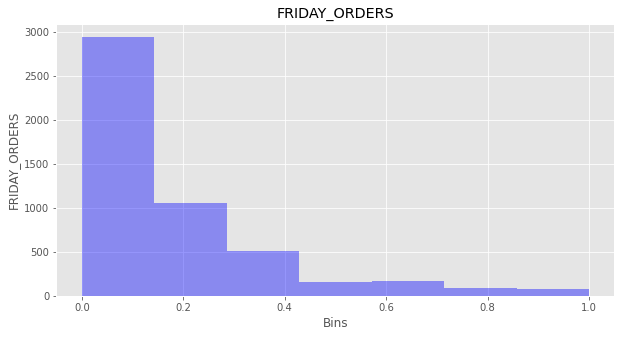

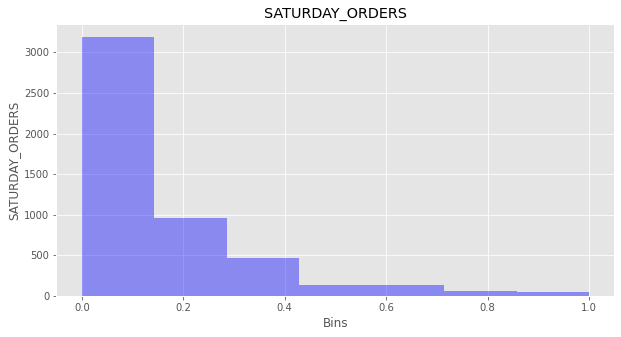

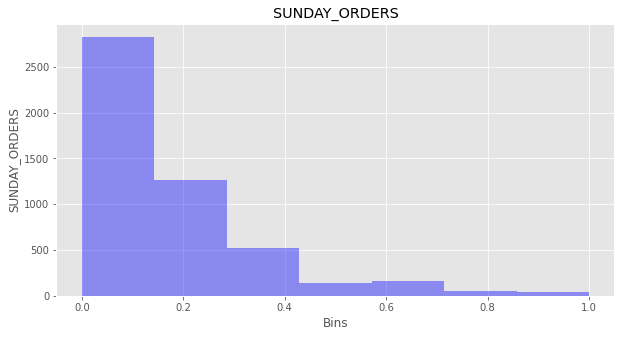

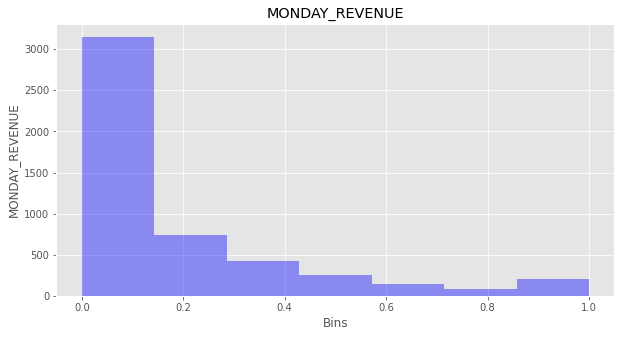

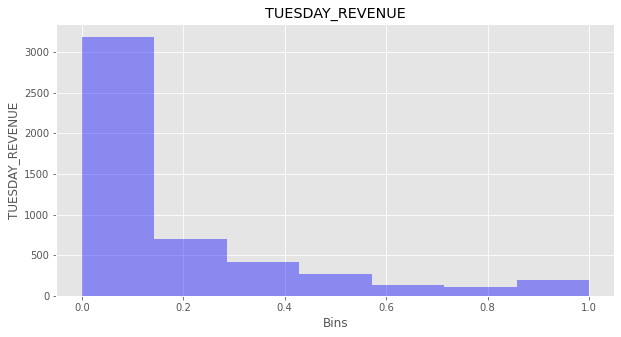

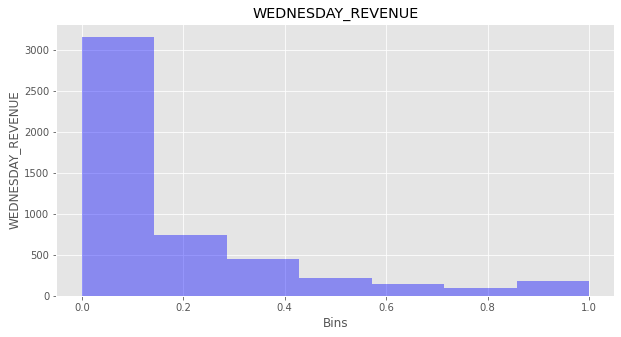

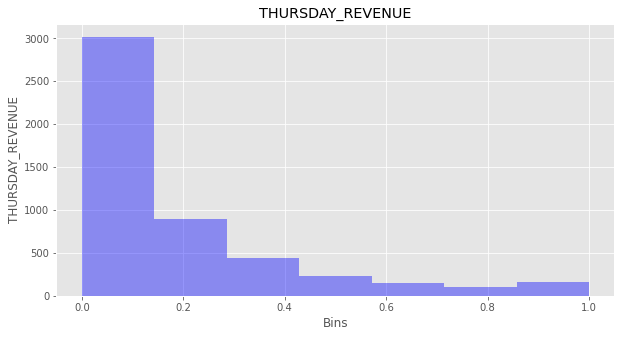

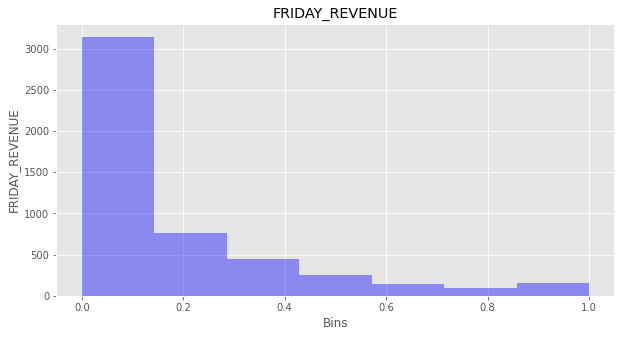

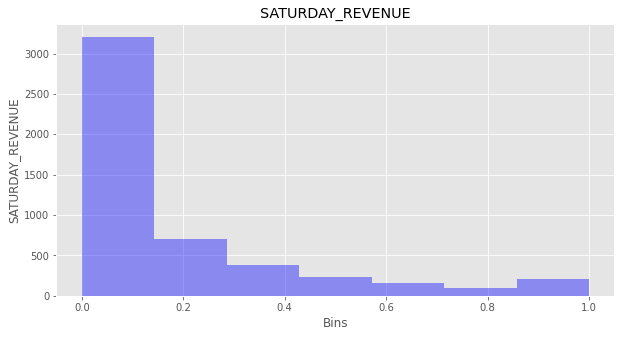

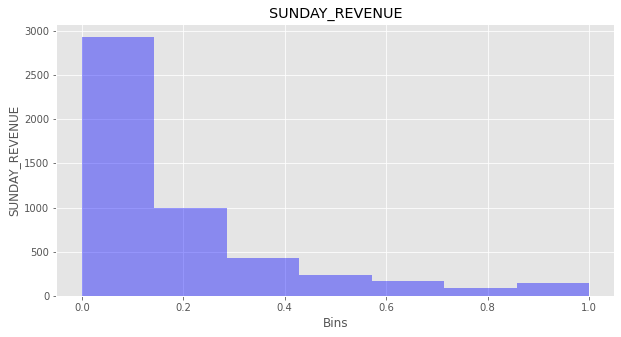

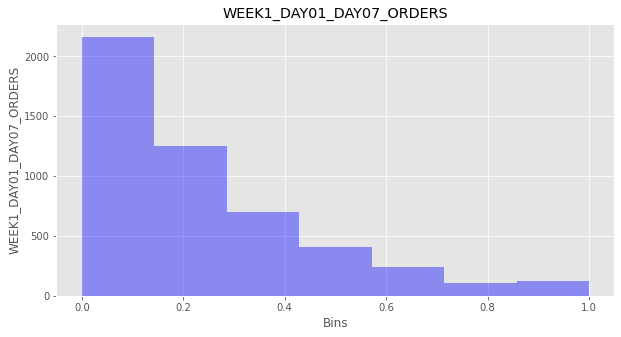

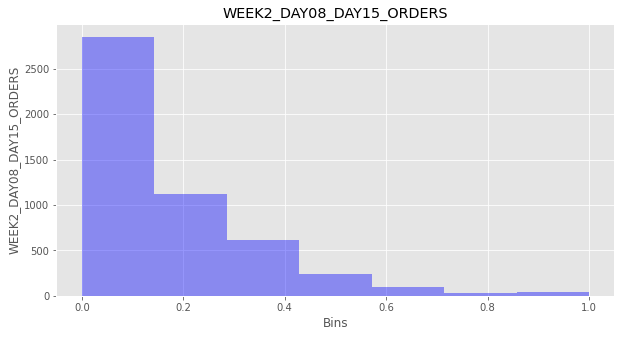

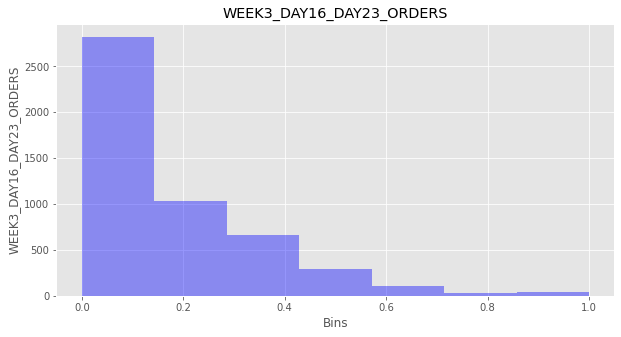

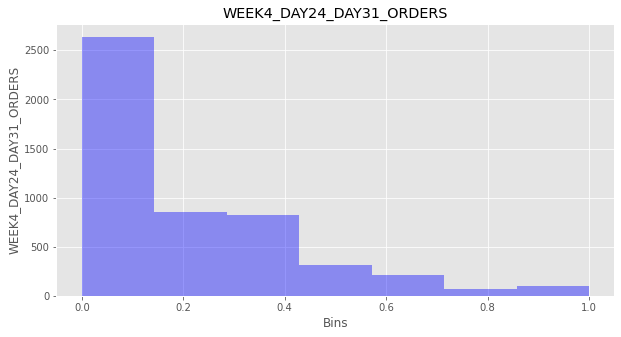

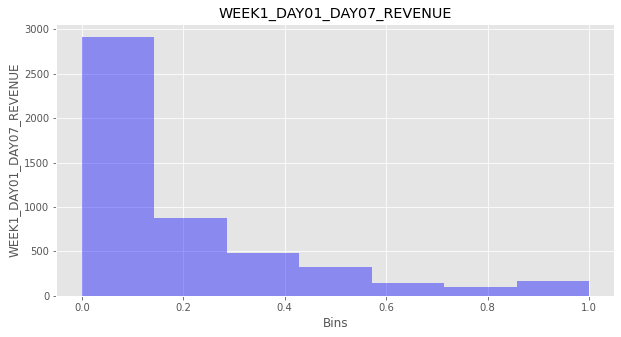

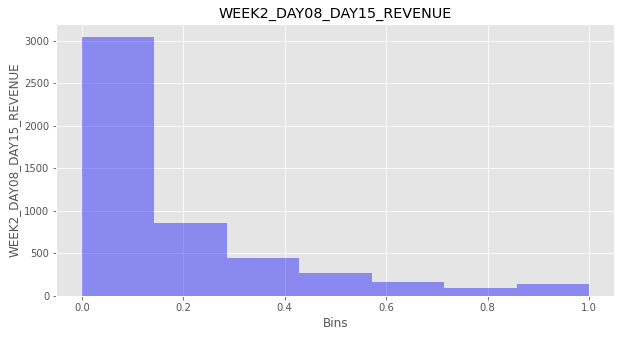

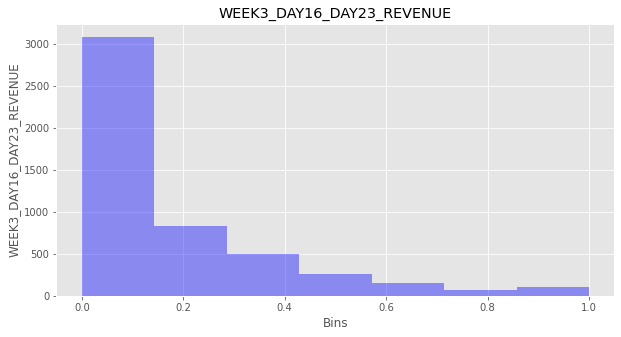

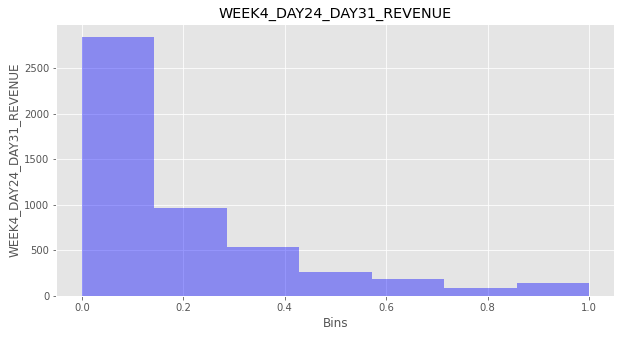

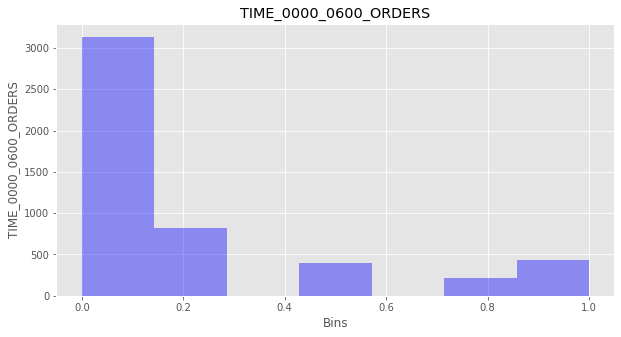

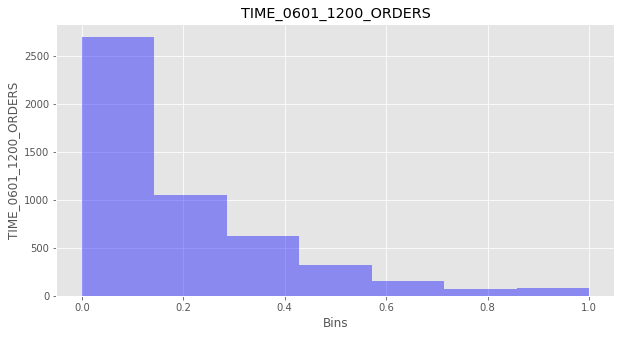

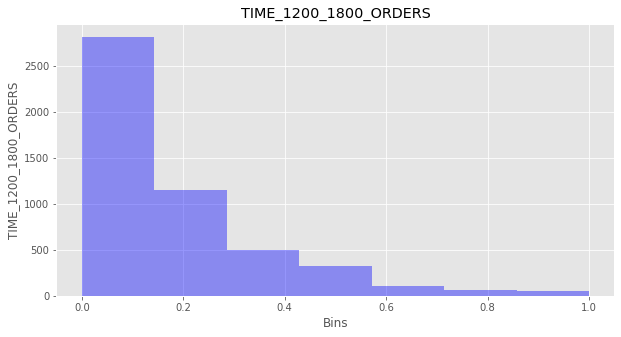

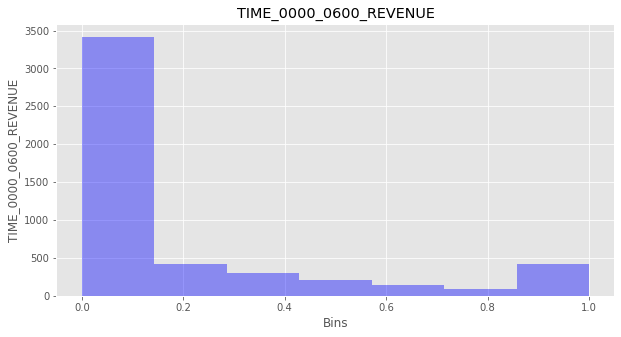

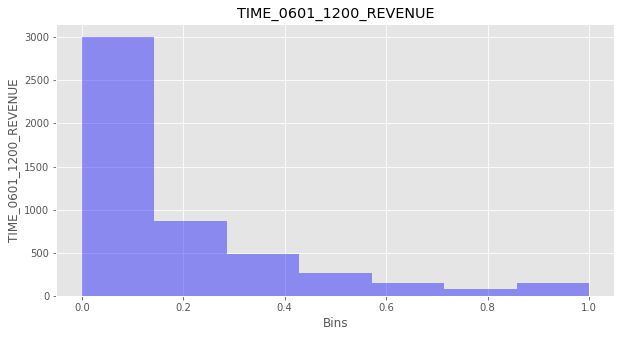

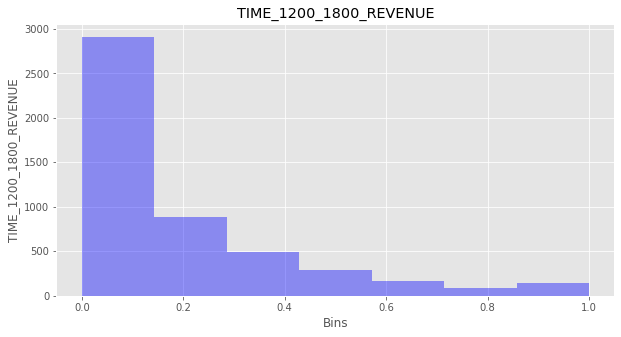

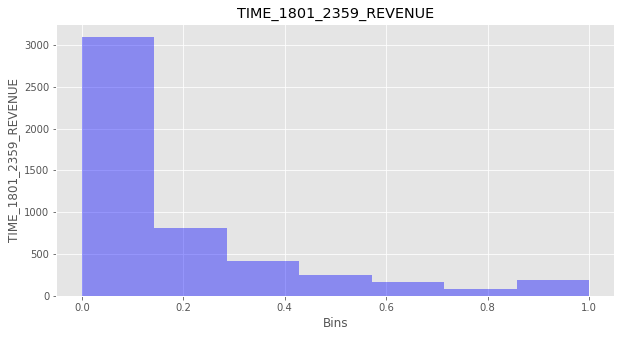

In [136]:
# histograms
print("\n*** Histogram Plot ***")
colNames = df.columns.tolist()
print('Histograms')
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()



*** Distribution Plot ***


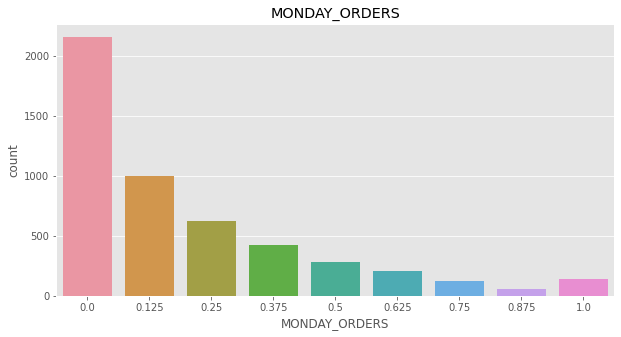

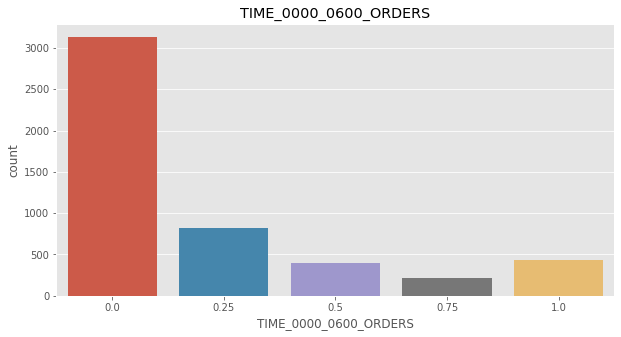

In [137]:
# class count plot
# change as required
vMaxCats = 10
colNames = df.columns.tolist()
print("\n*** Distribution Plot ***")
bFlag = False
for colName in colNames:
    if len(df[colName].unique()) > vMaxCats:
        continue
    plt.figure()
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()
    bFlag = True
if bFlag==False:
    print("No Categoric Variables Found")

In [138]:
################################
# Prepare Data
################################

# split into data & target
print("\n*** Prepare Data ***")
allCols = df.columns.tolist()
print(allCols)
#allCols.remove(clsVars)
print(allCols)
X = df[allCols].values
#y = df[clsVars].values


*** Prepare Data ***
['REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS', 'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS', 'TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE']
['REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUN

In [139]:
# shape
print("\n*** Prepare Data - Shape ***")
print(X.shape)
#print(y.shape)
print(type(X))
#print(type(y))


*** Prepare Data - Shape ***
(5000, 34)
<class 'numpy.ndarray'>


In [140]:
# head
print("\n*** Prepare Data - Head ***")
print(X[0:4])
#print(y[0:4])



*** Prepare Data - Head ***
[[1.         0.22549727 1.         0.36620926 0.02302002 1.
  1.         1.         1.         1.         1.         0.83333333
  1.         0.8474624  1.         1.         1.         1.
  0.82045742 1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.53580467]
 [1.         0.32459648 0.35285215 0.10205832 0.02577788 1.
  1.         0.83333333 1.         1.         0.83333333 0.91666667
  1.         1.         1.         0.8093551  1.         1.
  1.         1.         0.95       0.95       1.         0.71829706
  1.         1.         1.         0.25       0.61904762 0.96
  0.05760478 1.         0.75577419 1.        ]
 [0.80338121 0.41472721 0.61868041 0.34219554 0.0537296  0.625
  0.33333333 0.25       0.41666667 0.41666667 0.66666667 1.
  0.60912799 0.40596033 0.15466769 0.85882404 0.52018484 1.
  1.         0.69230769 0.55       0.3        1.         1.
  0.6251

In [146]:
################################
# Knn Clustering
###############################

# imports
from sklearn.cluster import KMeans

# how to decide on the clusters
# within cluster sum of squares errors - wcsse
# elbow method ... iterations should be more than 10
print("\n*** Compute WCSSE ***")
vIters = 20
lWcsse = []
for i in range(1, vIters):
    kmcModel = KMeans(n_clusters=i)
    kmcModel.fit(X)
    lWcsse.append(kmcModel.inertia_)
for vWcsse in lWcsse:                         #wcsse is imp 
    print(vWcsse)


*** Compute WCSSE ***
8646.993497413663
5642.14074281767
4930.911497407453
4564.101808940903
4264.347686345453
4023.7340224147574
3907.867585292858
3810.9211515205943
3731.433804404938
3671.742675320231
3618.871191207591
3562.3505004040476
3512.2342684407977
3459.16011743338
3415.636108922745
3375.8388278045877
3334.1484671343883
3309.2699089127955
3278.3352528034866


In [142]:
# programatically
!pip install kneed
print("\n*** Find Best K ***")
import kneed
kl = kneed.KneeLocator(range(1, vIters), lWcsse, curve="convex", direction="decreasing")
vBestK = kl.elbow
print(vBestK)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

*** Find Best K ***
5


In [147]:
# k means cluster model
print("\n*** Model Create & Train ***")
model = KMeans(n_clusters=vBestK, random_state=707)
model.fit(X)


*** Model Create & Train ***


KMeans(n_clusters=5, random_state=707)

In [148]:
# result
print("\n*** Model Results ***")
print(model.labels_)
df['PredKnn'] = model.labels_


*** Model Results ***
[4 4 4 ... 2 2 0]


In [149]:

# counts for knn
print("\n*** Counts For Knn ***")
print(df.groupby(df['PredKnn']).size())



*** Counts For Knn ***
PredKnn
0     865
1     660
2    1918
3    1204
4     353
dtype: int64



*** Distribution Plot - KNN ***


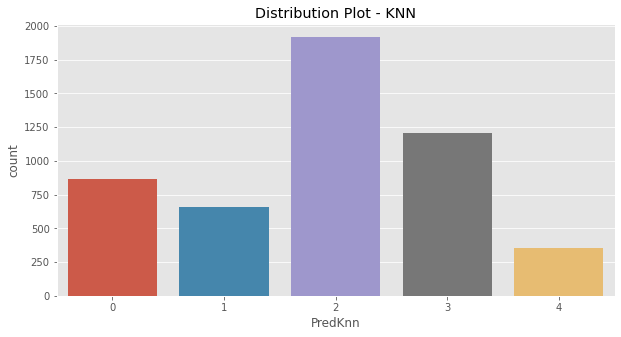

In [150]:
# class count plot
print("\n*** Distribution Plot - KNN ***")
plt.figure()
sns.countplot(data=df, x='PredKnn', label="Count")
plt.title('Distribution Plot - KNN')         
plt.show()

In [75]:
################################
# Hierarchical Clustering
###############################

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#method=’ward’ 
#uses the Ward variance minimization algorithm. The new entry  is computed as 
#per the formula. This is also known as the incremental algorithm.

# linkage
print("\n*** Linkage Method ***")
from scipy.cluster import hierarchy as hac
vLinkage = hac.linkage(df, 'ward')      
print("Done ...")



*** Linkage Method ***
Done ...



*** Plot Dendrogram ***
Looks Cluttered


<function matplotlib.pyplot.show>

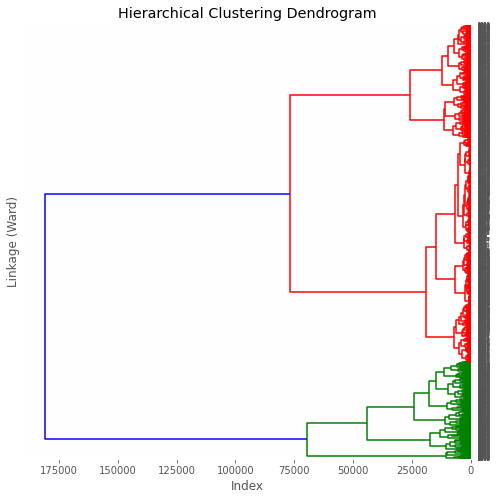

In [24]:
# make the dendrogram
print("\n*** Plot Dendrogram ***")
print("Looks Cluttered")
plt.figure(figsize=(8,8))
hac.dendrogram(vLinkage, 
               orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Linkage (Ward)')
plt.show



*** Plot Dendrogram ***
No Groups


<function matplotlib.pyplot.show>

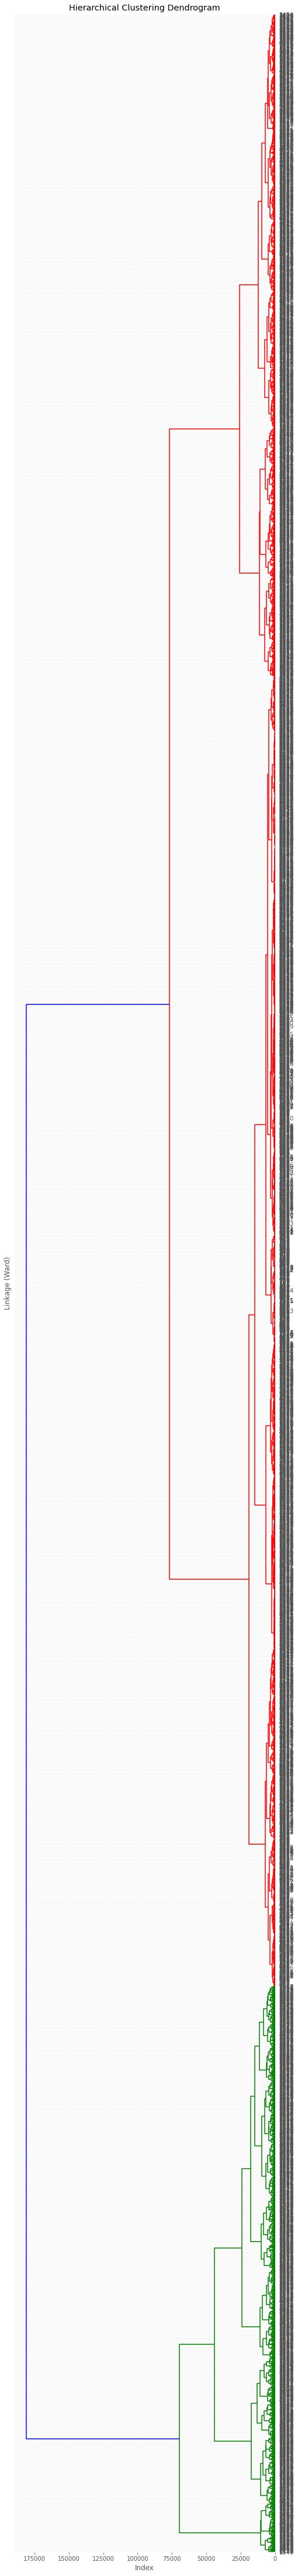

In [27]:
# make the dendrogram - large so readable
# make the dendrogram
print("\n*** Plot Dendrogram ***")     #the numbers signify the index number of the row, based on index number giving us a top down chart, splitting data into various clusters
print("No Groups")
plt.figure(figsize=(8,80))
hac.dendrogram(vLinkage, 
               leaf_font_size=10.,
               orientation='left')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Linkage (Ward)')
plt.show



*** Plot Dendrogram ***
With Groups


<function matplotlib.pyplot.show>

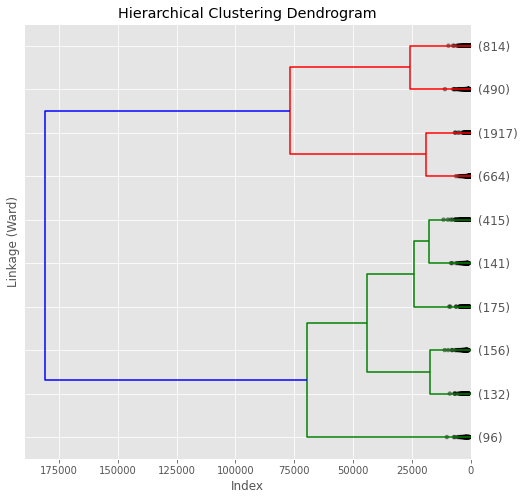

In [29]:
# make the dendrogram - truncated
# make the dendrogram
print("\n*** Plot Dendrogram ***")
print("With Groups")
plt.figure(figsize=(8,8))
hac.dendrogram(vLinkage,
               truncate_mode='lastp',   # show only the last p merged clusters.  we are creating 10 clusters
               p=10,                    # show only the last p merged clusters
               leaf_font_size=12.,
               show_contracted=True,    # to get a distribution impression in truncated branches
               orientation='left'       # left to right
               )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Linkage (Ward)')
plt.show


#we got a better chart, we got total number of a record in each cluster


In [151]:
# create cluster model #actual machine learning model
print("\n*** Agglomerative Clustering ***")
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #affinity is distance




*** Agglomerative Clustering ***


In [152]:
# train and group together
lGroups = model.fit_predict(df)      
print(lGroups) #for each record cluster number is printed

[1 1 1 ... 2 2 3]


In [153]:
# update data frame
df['GroupId'] = lGroups
# recreate data frame

In [154]:
df = pd.concat([dft, df], axis=1) #dfid we deleted earlier, we are getting it back
print("Done ...")

Done ...


In [155]:
# update data frame
df['PredHeir'] = lGroups
print("Done ...")

Done ...


In [156]:
# counts for heir
print("\n*** Counts For Heir ***")
print(df.groupby(df['PredHeir']).size())



*** Counts For Heir ***
PredHeir
0    1207
1     350
2    1918
3     865
4     660
dtype: int64


In [157]:
# check class
# outcome groupby count    
print("\n*** Group Counts ***")
print(df.groupby('GroupId').size())
print("")


*** Group Counts ***
GroupId
0    1207
1     350
2    1918
3     865
4     660
dtype: int64




*** Distribution Plot ***


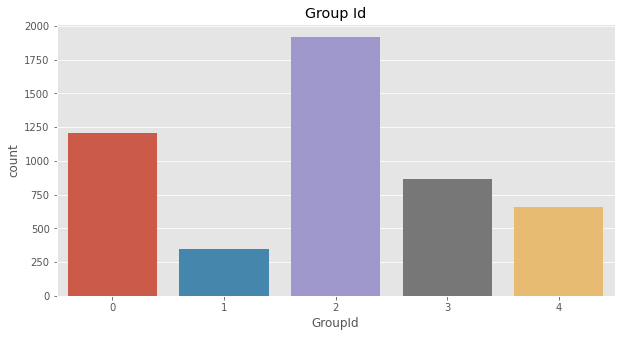

In [158]:
# class count plot
print("\n*** Distribution Plot ***")
plt.figure()
sns.countplot(data=df, x='GroupId', label="Count")
plt.title('Group Id')
plt.show()

In [159]:
################################
# Compare
###############################

# counts for knn
print("\n*** Counts For Knn ***")
print(df.groupby(df['PredKnn']).size())



*** Counts For Knn ***
PredKnn
0     865
1     660
2    1918
3    1204
4     353
dtype: int64


In [160]:
# counts for heir
print("\n*** Counts For Heir ***")
print(df.groupby(df['PredHeir']).size())


*** Counts For Heir ***
PredHeir
0    1207
1     350
2    1918
3     865
4     660
dtype: int64


In [161]:
# interchange as required ...could be different for each group
df['PredHeir'] = df['PredHeir'].map({0:3, 1:4, 2:2, 3:0,4:1})


In [162]:
# counts for knn
print("\n*** Counts For Knn ***")
print(df.groupby(df['PredKnn']).size())


*** Counts For Knn ***
PredKnn
0     865
1     660
2    1918
3    1204
4     353
dtype: int64


In [163]:
# counts for heir
print("\n*** Counts For Heir ***")
print(df.groupby(df['PredHeir']).size())


*** Counts For Heir ***
PredHeir
0     865
1     660
2    1918
3    1207
4     350
dtype: int64


In [164]:
# imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import v_measure_score

In [165]:
# confusion matrix
print("\n*** Confusion Matrix - Actual ***")
cm = confusion_matrix(df['PredKnn'], df['PredKnn'])
print(cm)
print("\n*** Confusion Matrix - Clustered ***")
cm = confusion_matrix(df['PredKnn'], df['PredHeir'])
print(cm)


*** Confusion Matrix - Actual ***
[[ 865    0    0    0    0]
 [   0  660    0    0    0]
 [   0    0 1918    0    0]
 [   0    0    0 1204    0]
 [   0    0    0    0  353]]

*** Confusion Matrix - Clustered ***
[[ 865    0    0    0    0]
 [   0  660    0    0    0]
 [   0    0 1918    0    0]
 [   0    0    0 1204    0]
 [   0    0    0    3  350]]


In [166]:
# accuracy 
print("\n*** Accuracy ***")
ac = accuracy_score(df['PredKnn'], df['PredHeir'])*100 #acceptable algorithm
print(ac)


*** Accuracy ***
99.94


In [167]:
# v-measure score
# checks clusters on two counts
# how homogeneous a cluster is 
# how complete cluster is
# https://towardsdatascience.com/v-measure-an-homogeneous-and-complete-clustering-ab5b1823d0ad
# Interpretation: Between 0 & 1 is acceptable ... closer to 1 the better
print("\n*** V-Score ***")
vm = v_measure_score(df['PredKnn'], df['PredHeir'])
print(vm)



*** V-Score ***
0.9973924175252659
